___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
#conda install -c conda-forge cufflinks-py

In [2]:
#conda install -c districtdatalabs yellowbrick

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio

pio.renderers.default = 'notebook'
pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Explore Data

You can rename columns to more usable, if you need.

In [6]:
df.rename(columns= {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
df.head(1)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39


In [7]:
X = df.copy()

In [8]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['Male', 'Female']

enc = OrdinalEncoder(categories= [categories])

enc.fit_transform(X[["Gender"]])
    

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

In [9]:
yeni = pd.DataFrame( enc.fit_transform(X[["Gender"]]) )

In [10]:
X['Gender'] = yeni
X


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,0.00,19,15,39
1,2,0.00,21,15,81
2,3,1.00,20,16,6
3,4,1.00,23,16,77
4,5,1.00,31,17,40
...,...,...,...,...,...
195,196,1.00,35,120,79
196,197,1.00,45,126,28
197,198,0.00,32,126,74
198,199,0.00,32,137,18


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    float64
 2   Age             200 non-null    int64  
 3   Annual_Income   200 non-null    int64  
 4   Spending_Score  200 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





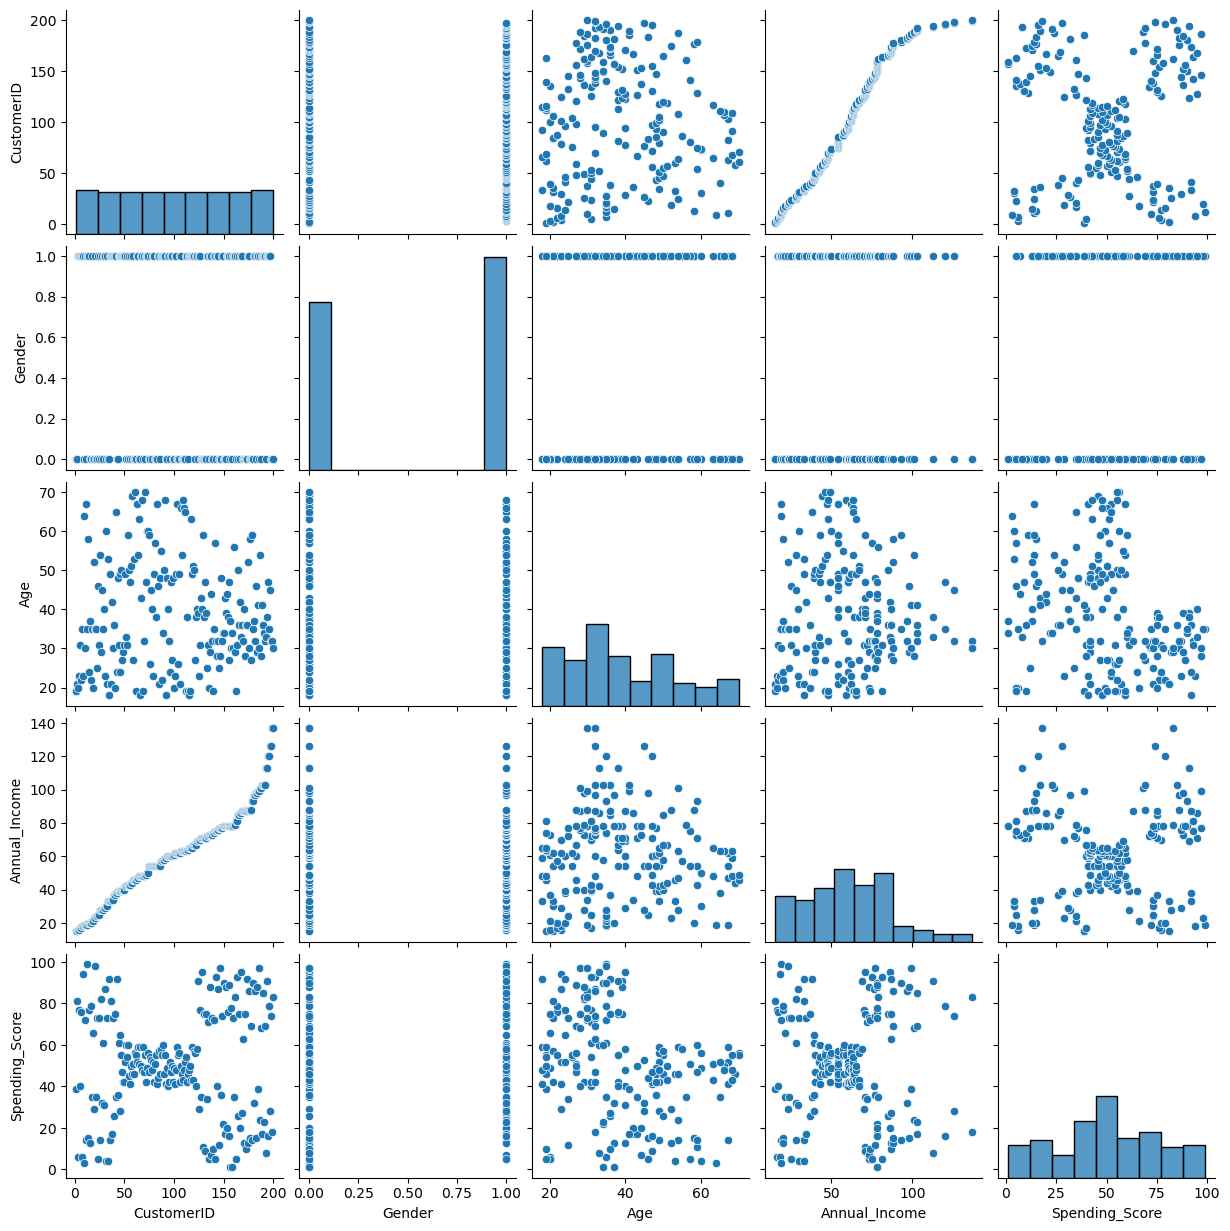

In [12]:
sns.pairplot(X)
plt.show();

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
X_1= pd.DataFrame(X_scaled, columns =X.columns)
X_1

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,0.00,0.00,0.02,0.00,0.39
1,0.01,0.00,0.06,0.00,0.82
2,0.01,1.00,0.04,0.01,0.05
3,0.02,1.00,0.10,0.01,0.78
4,0.02,1.00,0.25,0.02,0.40
...,...,...,...,...,...
195,0.98,1.00,0.33,0.86,0.80
196,0.98,1.00,0.52,0.91,0.28
197,0.99,0.00,0.27,0.91,0.74
198,0.99,0.00,0.27,1.00,0.17


In [16]:
X_1.drop(columns=['CustomerID'], inplace=True)

In [17]:
X_1

,Gender,Age,Annual_Income,Spending_Score
0,0.00,0.02,0.00,0.39
1,0.00,0.06,0.00,0.82
2,1.00,0.04,0.01,0.05
3,1.00,0.10,0.01,0.78
4,1.00,0.25,0.02,0.40
...,...,...,...,...
195,1.00,0.33,0.86,0.80
196,1.00,0.52,0.91,0.28
197,0.00,0.27,0.91,0.74
198,0.00,0.27,1.00,0.17


## Hopkins Test

In [18]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [19]:
hopkins(X_1, X_1.shape[0])

# Hopkins Test sonucu datamızın clustering eğilimini ölçer, sonucun 0'a yakın çıkması datamızın clusteringe eğilimli 
# olduğunu gösterir. Mevcut datamız için Hopkins Test sonucu 0.19-0.20 bandında çıkıyor. Çok çok iyi bir skor değil!

0.20394166498756475

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [20]:
X_2 = X_1.loc[:, ['Age', 'Spending_Score']]

In [21]:
X_2

,Age,Spending_Score
0,0.02,0.39
1,0.06,0.82
2,0.04,0.05
3,0.10,0.78
4,0.25,0.40
...,...,...
195,0.33,0.80
196,0.52,0.28
197,0.27,0.74
198,0.27,0.17


#### *ii. Determine optimal number of clusters*

### Elbow Metodu

In [22]:
from sklearn.cluster import KMeans


ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

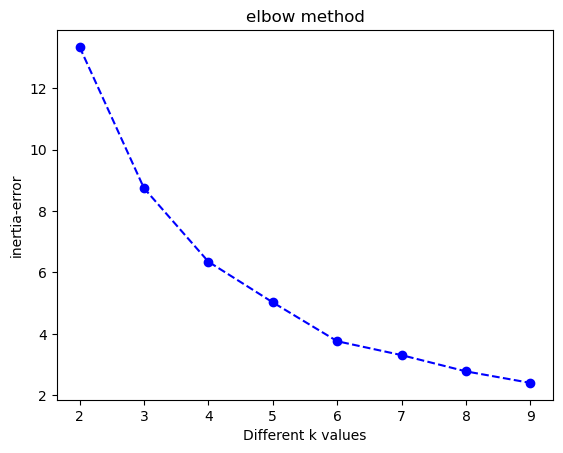

In [23]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [24]:
ssd

[13.337690580804235,
 8.742042168276534,
 6.3502463191224745,
 5.026143351352525,
 3.762796809327069,
 3.310446181738137,
 2.781552120356593,
 2.406636281222873]

In [25]:
-pd.Series(ssd).diff()

# Elbow Metodu k olarak 3'ü öneriyor...

0    NaN
1   4.60
2   2.39
3   1.32
4   1.26
5   0.45
6   0.53
7   0.37
dtype: float64

### Yellowbrick Yöntemi

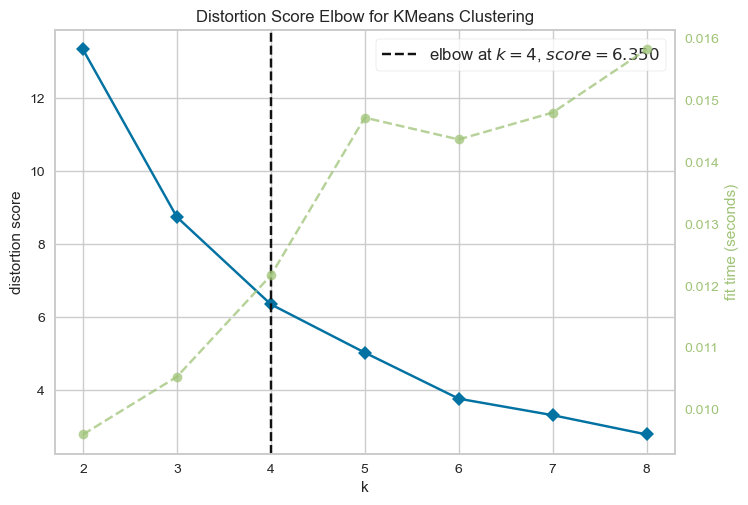

In [26]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_2)        # Fit the data to the visualizer
visualizer.poof();

# Yellowbrick Yöntemi ise bize k'yı 4 olarak önerdi. Şimdi Silhouette Skorlarına bakıp nihai kararımızı vereceğiz.

### Silhouette Analysis

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.4288271307195917
For n_clusters=5, the silhouette score is 0.44625330587100703
For n_clusters=6, the silhouette score is 0.45615225386265235
For n_clusters=7, the silhouette score is 0.40578335793980225
For n_clusters=8, the silhouette score is 0.4169908111029726


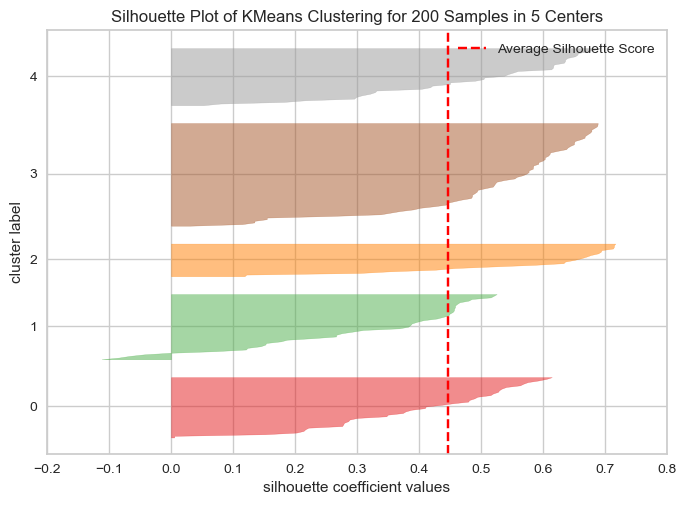

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=42)          # n_clusters=5'e karar verdik !
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_2)    # Fit the data to the visualizer
visualizer.poof();

In [30]:
model.labels_

array([0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3,
       1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 4, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 2, 4, 4, 4, 2, 0, 4, 2, 0, 2, 4, 2, 0,
       4, 2, 0, 0, 2, 4, 2, 2, 2, 0, 4, 4, 0, 4, 2, 4, 2, 4, 0, 4, 4, 0,
       3, 4, 2, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 2, 0, 4, 0, 2, 4, 2, 2,
       2, 0, 4, 0, 0, 0, 2, 4, 4, 4, 0, 4, 4, 3, 0, 3, 4, 3, 1, 3, 1, 3,
       0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 4, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [31]:
visualizer.silhouette_samples_

array([ 5.92854597e-01,  4.85428697e-01,  2.16464935e-01,  4.94227522e-01,
        3.73719069e-01,  4.44384741e-01,  4.07078895e-01,  5.67307188e-01,
        1.44428220e-01,  5.53875022e-01,  1.18515816e-01,  5.92318547e-01,
        2.66181632e-01,  5.22722052e-01,  4.49217261e-01,  4.93280350e-01,
        5.07161480e-03,  3.02124317e-02, -1.11948417e-01,  5.99356667e-01,
        5.07161480e-03,  4.67950795e-01,  5.20423343e-01,  5.83742653e-01,
        3.82452976e-01,  6.71091359e-01,  2.16668308e-01,  1.54323514e-01,
       -8.44759135e-02,  5.73246842e-01,  2.93367054e-01,  3.37906401e-01,
        4.56255879e-01,  4.56262470e-01,  4.61337220e-01,  4.85428697e-01,
        4.54112274e-01,  5.76784943e-01,  1.87056033e-01,  3.53622545e-01,
        5.20810705e-01,  5.92402660e-01,  4.50006884e-01,  1.34141340e-01,
       -4.32969030e-02,  1.14809200e-01,  5.36899560e-01,  5.33366495e-01,
        4.94154638e-01,  3.78211899e-01,  6.16032468e-01,  1.34730505e-01,
        2.13544833e-01,  

In [32]:
for i in range(5):
    print(f"mean silhoutte score for label {i:<4} : {visualizer.silhouette_samples_[model.labels_ == i].mean()}")
print(f"mean silhoutte score for all labels : {silhouette_score(X_2, model.labels_)}")

mean silhoutte score for label 0    : 0.39200902129285176
mean silhoutte score for label 1    : 0.2998096006031723
mean silhoutte score for label 2    : 0.559562486749179
mean silhoutte score for label 3    : 0.5163984578752132
mean silhoutte score for label 4    : 0.47949475596101565
mean silhoutte score for all labels : 0.44625330587100703


#### *iii. Apply K Means*

In [33]:
model2 = KMeans(n_clusters = 5, random_state=42)
model2.fit_predict(X_2)

array([0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3,
       1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 4, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 2, 4, 4, 4, 2, 0, 4, 2, 0, 2, 4, 2, 0,
       4, 2, 0, 0, 2, 4, 2, 2, 2, 0, 4, 4, 0, 4, 2, 4, 2, 4, 0, 4, 4, 0,
       3, 4, 2, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 2, 0, 4, 0, 2, 4, 2, 2,
       2, 0, 4, 0, 0, 0, 2, 4, 4, 4, 0, 4, 4, 3, 0, 3, 4, 3, 1, 3, 1, 3,
       0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 4, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [34]:
model2.labels_

array([0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3,
       1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 4, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 2, 4, 4, 4, 2, 0, 4, 2, 0, 2, 4, 2, 0,
       4, 2, 0, 0, 2, 4, 2, 2, 2, 0, 4, 4, 0, 4, 2, 4, 2, 4, 0, 4, 4, 0,
       3, 4, 2, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 2, 0, 4, 0, 2, 4, 2, 2,
       2, 0, 4, 0, 0, 0, 2, 4, 4, 4, 0, 4, 4, 3, 0, 3, 4, 3, 1, 3, 1, 3,
       0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 4, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [35]:
clusters2 = model2.labels_

In [36]:
X_comp = df

In [37]:
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
X_comp['Pred(Age-S_S-KMeans)'] = clusters2

In [39]:
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Pred(Age-S_S-KMeans)
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

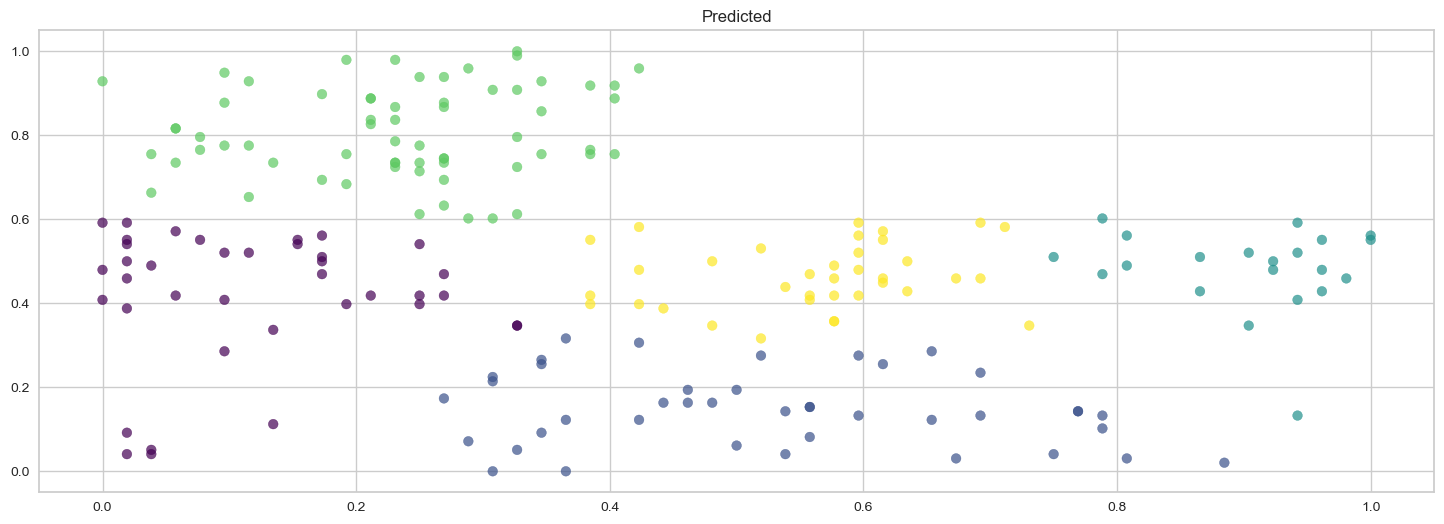

In [40]:
plt.figure(figsize = (18,6))

plt.scatter(X_2["Age"], X_2["Spending_Score"], c = clusters2, cmap = "viridis", alpha=0.7)
plt.title("Predicted")  
plt.show();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [41]:
X_3 = X_1.loc[:, ['Annual_Income', 'Spending_Score']]

In [42]:
X_3

,Annual_Income,Spending_Score
0,0.00,0.39
1,0.00,0.82
2,0.01,0.05
3,0.01,0.78
4,0.02,0.40
...,...,...
195,0.86,0.80
196,0.91,0.28
197,0.91,0.74
198,1.00,0.17


#### *ii. Determine optimal number of clusters*

### Elbow Methhod

In [43]:
from sklearn.cluster import KMeans


ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_3)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

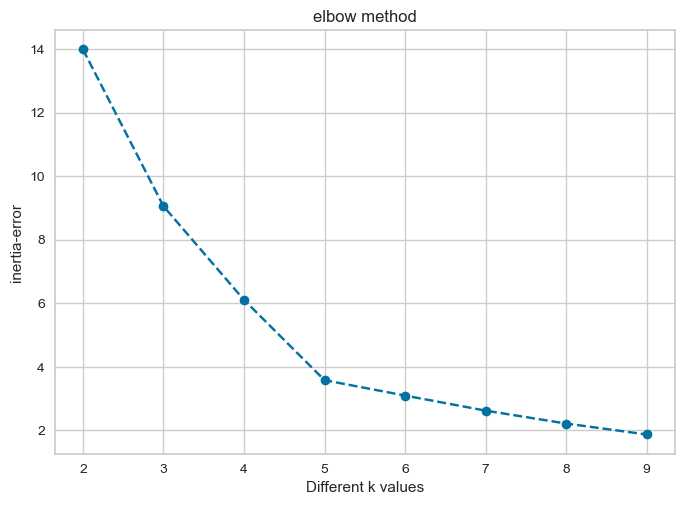

In [44]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [45]:
ssd

[13.993505283127975,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.098385141882586,
 2.624103948396721,
 2.2180573120830718,
 1.873434667867071]

In [46]:
-pd.Series(ssd).diff()

# Elbow Metodu k olarak 3'ü öneriyor...

0    NaN
1   4.93
2   2.95
3   2.53
4   0.48
5   0.47
6   0.41
7   0.34
dtype: float64

### Yellowbrick Method

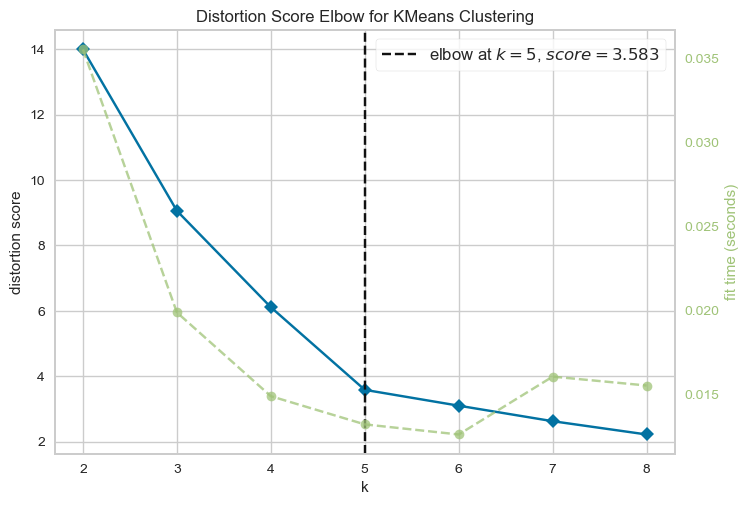

In [47]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_3)       
visualizer.poof();

# Yellowbrick Yöntemi ise bize k'yı 5 olarak önerdi. Şimdi Silhouette Skorlarına bakıp nihai kararımızı vereceğiz.

### Silhouette Analysis

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3334020547986479
For n_clusters=3, the silhouette score is 0.45149093095396486
For n_clusters=4, the silhouette score is 0.49620078746385005
For n_clusters=5, the silhouette score is 0.5594854531357838
For n_clusters=6, the silhouette score is 0.5377658513133245
For n_clusters=7, the silhouette score is 0.518791661194564
For n_clusters=8, the silhouette score is 0.4303846185947657


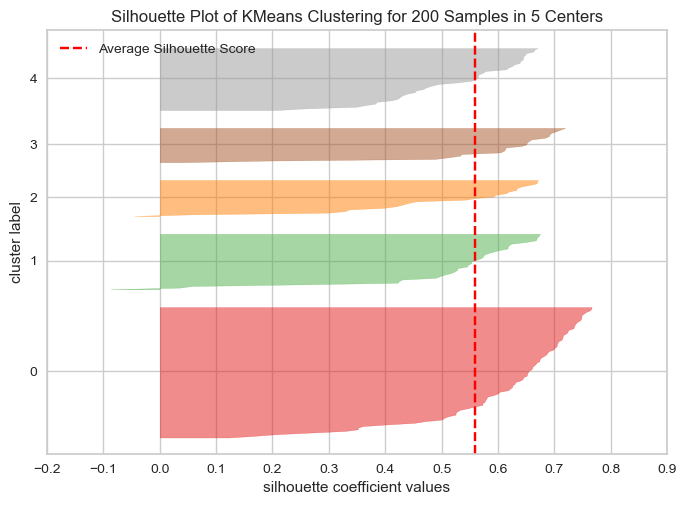

In [50]:
from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5, random_state=42)          # n_clusters=5'e karar verdik !
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X_3)    # Fit the data to the visualizer
visualizer.poof();

In [51]:
model5.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [52]:
visualizer.silhouette_samples_

array([ 0.33580108,  0.69473511,  0.63293448,  0.69123745,  0.2984495 ,
        0.69012557,  0.64026293,  0.6506099 ,  0.61925785,  0.64198051,
        0.66840951,  0.61039547,  0.66931342,  0.71048714,  0.67094677,
        0.71898933,  0.41979519,  0.4883633 ,  0.54272109,  0.61300382,
        0.39751963,  0.65956848,  0.63280583,  0.65459908,  0.65535602,
        0.70325269,  0.44169021,  0.19342169,  0.45505638,  0.68369556,
        0.59543314,  0.60403987,  0.5602012 ,  0.61353253,  0.61456446,
        0.65119975,  0.59288044,  0.53509558,  0.43065719,  0.51180251,
        0.05947421,  0.53277759, -0.04466494,  0.16772625,  0.32926751,
        0.03761109,  0.45215253,  0.50055572,  0.35136978,  0.35136978,
        0.57222956,  0.32844447,  0.55821474,  0.36011199,  0.53298812,
        0.40320704,  0.63977123,  0.57987703,  0.66886229,  0.62150424,
        0.57742035,  0.60215641,  0.67373044,  0.50442533,  0.70008932,
        0.52474556,  0.70700731,  0.68768234,  0.52474556,  0.67

In [53]:
for i in range(5):
    print(f"mean silhoutte score for label {i:<4} : {visualizer.silhouette_samples_[model5.labels_ == i].mean()}")
print(f"mean silhoutte score for all labels : {silhouette_score(X_3, model5.labels_)}")

mean silhoutte score for label 0    : 0.6119010983052857
mean silhoutte score for label 1    : 0.5100676264333632
mean silhoutte score for label 2    : 0.4877449175242944
mean silhoutte score for label 3    : 0.585932908834499
mean silhoutte score for label 4    : 0.5223609651754655
mean silhoutte score for all labels : 0.5594854531357838


#### *iii. Applying K Means* for 5 Clusters

In [54]:
model3 = KMeans(n_clusters = 5, random_state=42)
model3.fit_predict(X_3)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [55]:
model3.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [56]:
clusters3 = model3.labels_

In [57]:
X_comp['Pred(A_I-S_S-KMeans)'] = clusters3

In [58]:
X_comp

# İki ayrı feature kombinasyonuyla yaptığımız modellemelerin sonuçlarını df'in sonuna ekledik...

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Pred(Age-S_S-KMeans),Pred(A_I-S_S-KMeans)
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,4
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,3,4
198,199,Male,32,137,18,1,1


#### *iv. Visualizing and Labeling All the Clusters*

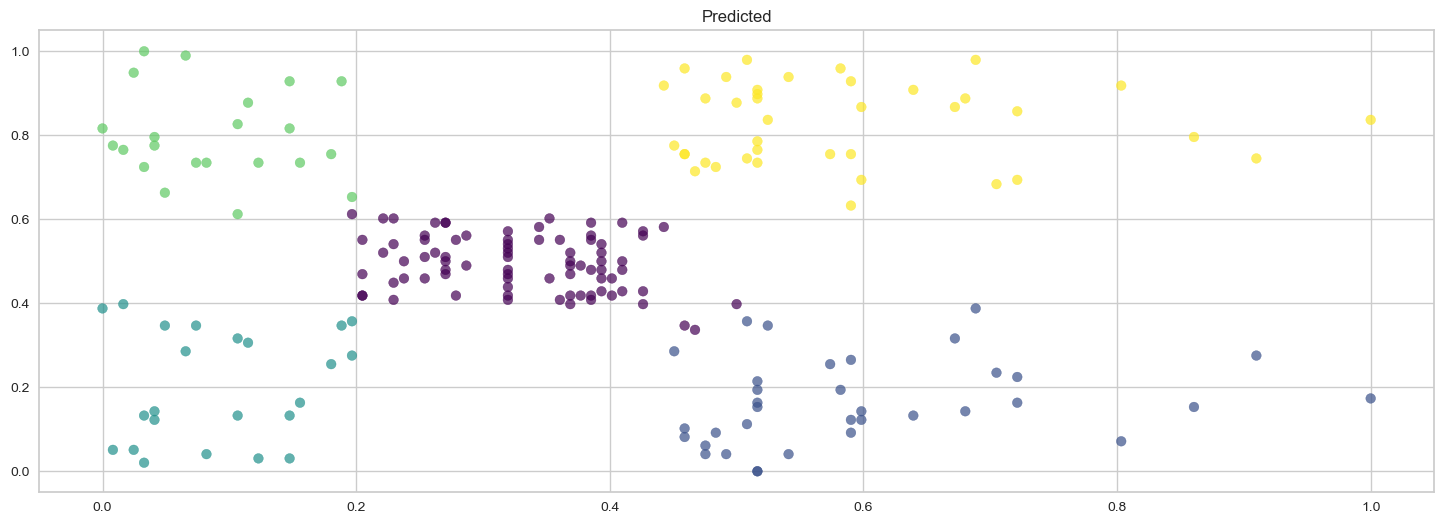

In [59]:
plt.figure(figsize = (18,6))

plt.scatter(X_3["Annual_Income"], X_3["Spending_Score"], c = clusters3, cmap = "viridis", alpha=0.7)
plt.title("Predicted")  
plt.show();

#### Comparison of Clusters Obtained From Age-Spending Score and Annual_Income-Spending_Score Features

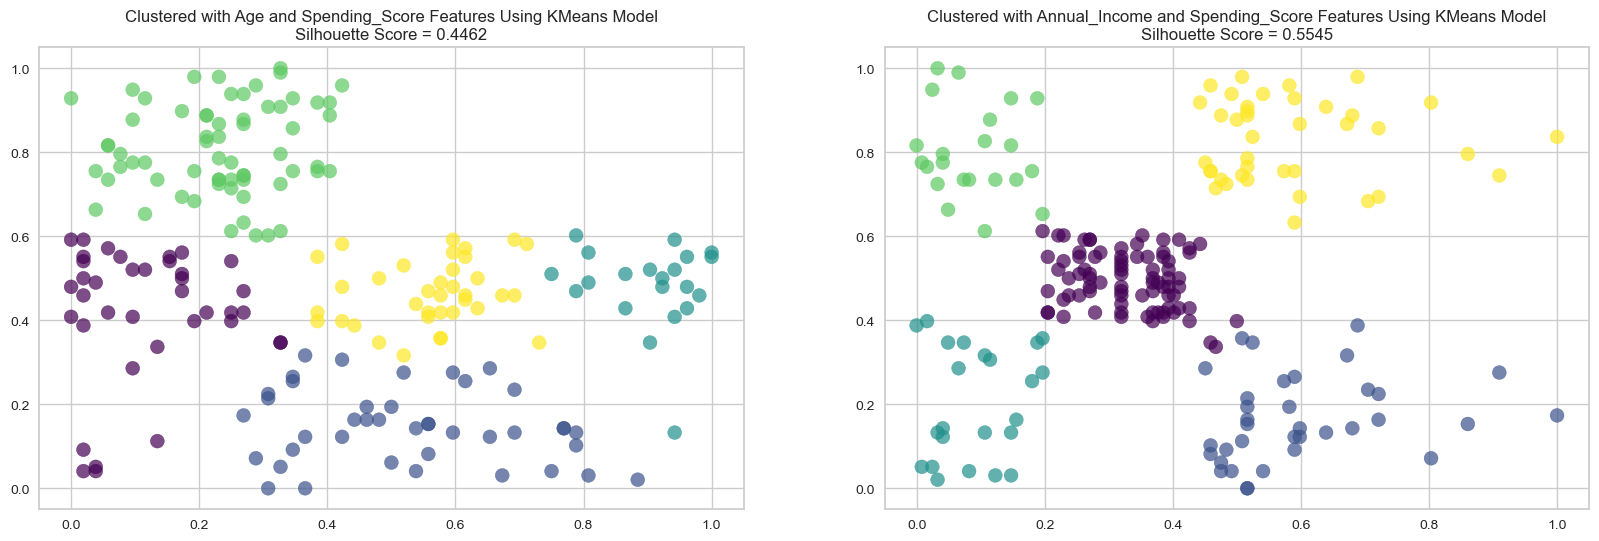

In [60]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X_2["Age"], X_2["Spending_Score"], c = clusters2, cmap = "viridis", alpha=0.7, s=100)
plt.title("Clustered with Age and Spending_Score Features Using KMeans Model\nSilhouette Score = 0.4462")

plt.subplot(122)
plt.scatter(X_3["Annual_Income"], X_3["Spending_Score"], c = clusters3, cmap = "viridis", alpha=0.7, s=100)
plt.title("Clustered with Annual_Income and Spending_Score Features Using KMeans Model\nSilhouette Score = 0.5545");

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score-

In [61]:
X_2

,Age,Spending_Score
0,0.02,0.39
1,0.06,0.82
2,0.04,0.05
3,0.10,0.78
4,0.25,0.40
...,...,...
195,0.33,0.80
196,0.52,0.28
197,0.27,0.74
198,0.27,0.17


### Hopkins Test

In [62]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]

In [63]:
hopkins(X_2, X_2.shape[0])

# Test sonucu 0.5'in altında olduğu için datamın clusterlanabilir olduğunu söyleyebilirim.

0.3101489114058151

### Dendrogram

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
hc_ward = linkage(y = X_2, method = "ward")
hc_complete = linkage(X_2, "complete")
hc_average = linkage(X_2, "average")
hc_single = linkage(X_2, "single")

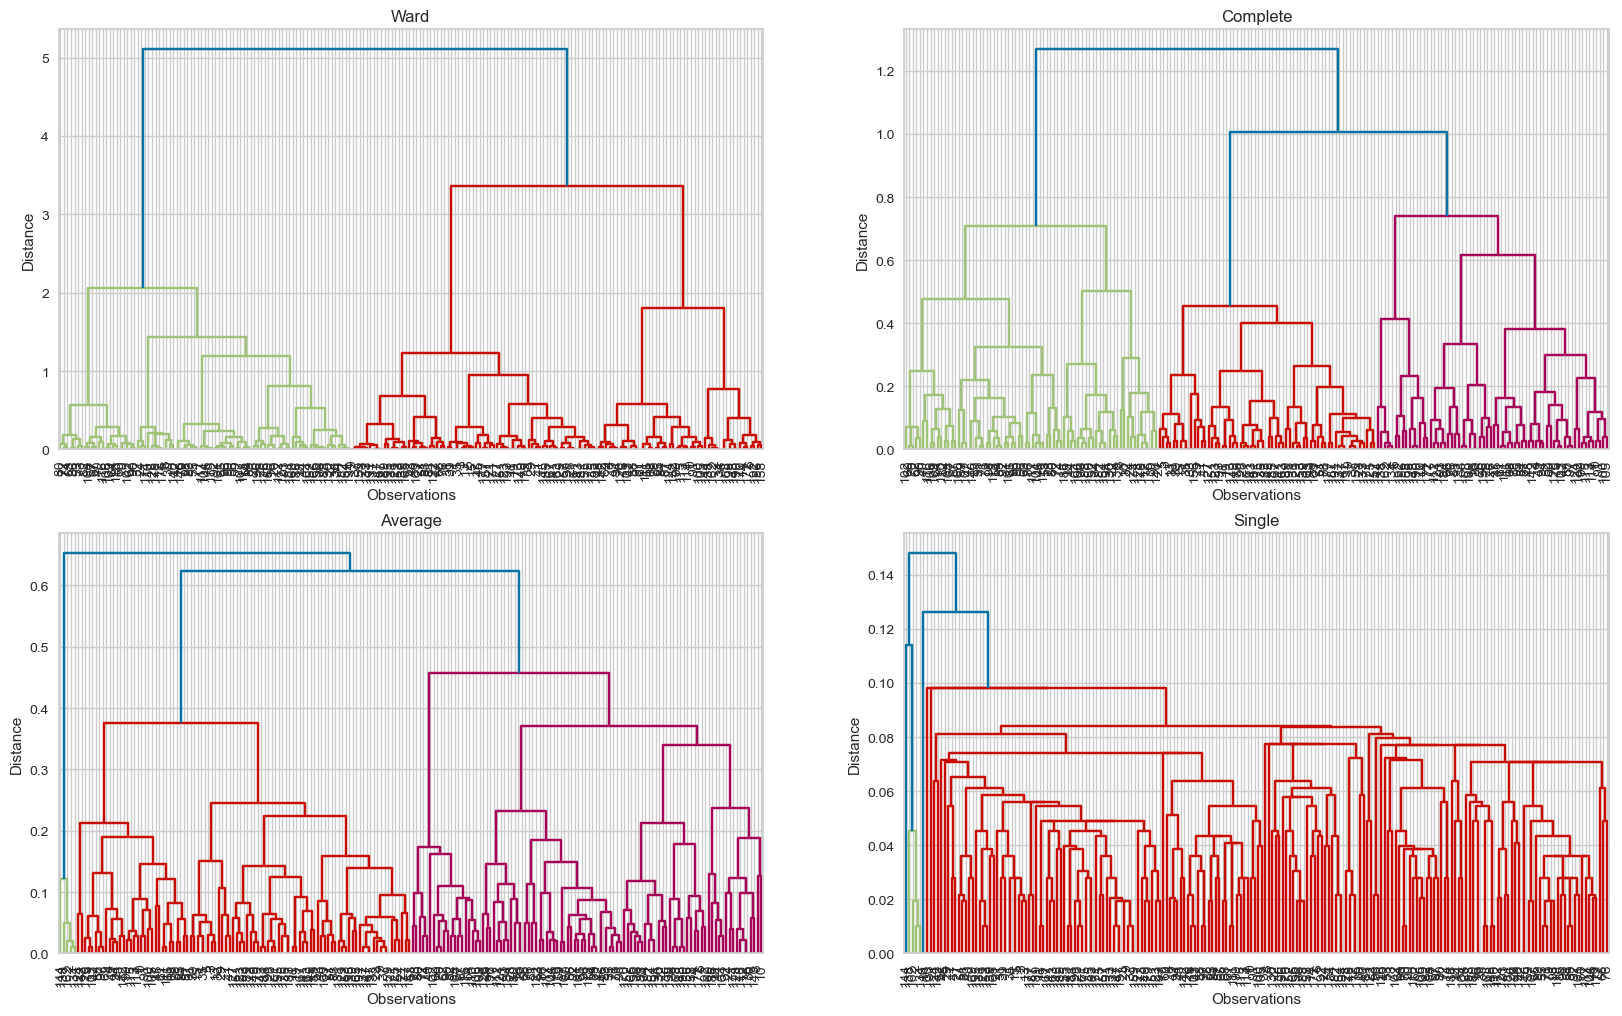

In [66]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

## Hierarchical Clustering (Agglomerative)

In [67]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

In [68]:
from sklearn.metrics import silhouette_score

In [69]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_2, model.labels_)}')

Silhouette Score for 2 clusters: 0.41699937625242867
Silhouette Score for 3 clusters: 0.4171245766527479
Silhouette Score for 4 clusters: 0.38986443147481753
Silhouette Score for 5 clusters: 0.3766824104633079
Silhouette Score for 6 clusters: 0.39920932010291077
Silhouette Score for 7 clusters: 0.35892982172762045
Silhouette Score for 8 clusters: 0.3611306861915168
Silhouette Score for 9 clusters: 0.3657953810746082


In [70]:
model2_hc = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")

In [71]:
model2_hc.fit_predict(X_2)

array([4, 2, 1, 2, 4, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 3, 2, 0, 2,
       0, 2, 0, 4, 4, 4, 0, 2, 2, 3, 0, 0, 0, 3, 4, 0, 3, 4, 3, 3, 3, 4,
       2, 3, 4, 4, 3, 0, 3, 3, 3, 4, 2, 2, 4, 0, 3, 2, 3, 0, 4, 0, 3, 4,
       2, 0, 3, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 3, 4, 0, 4, 3, 0, 3, 3,
       3, 4, 0, 4, 4, 4, 3, 0, 0, 0, 4, 0, 2, 2, 4, 2, 0, 2, 0, 2, 0, 2,
       4, 2, 1, 2, 0, 2, 1, 2, 0, 2, 4, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2])

In [72]:
model2_hc.labels_

array([4, 2, 1, 2, 4, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 3, 2, 0, 2,
       0, 2, 0, 4, 4, 4, 0, 2, 2, 3, 0, 0, 0, 3, 4, 0, 3, 4, 3, 3, 3, 4,
       2, 3, 4, 4, 3, 0, 3, 3, 3, 4, 2, 2, 4, 0, 3, 2, 3, 0, 4, 0, 3, 4,
       2, 0, 3, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 3, 4, 0, 4, 3, 0, 3, 3,
       3, 4, 0, 4, 4, 4, 3, 0, 0, 0, 4, 0, 2, 2, 4, 2, 0, 2, 0, 2, 0, 2,
       4, 2, 1, 2, 0, 2, 1, 2, 0, 2, 4, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2])

In [73]:
clusters2_hc = model2_hc.labels_

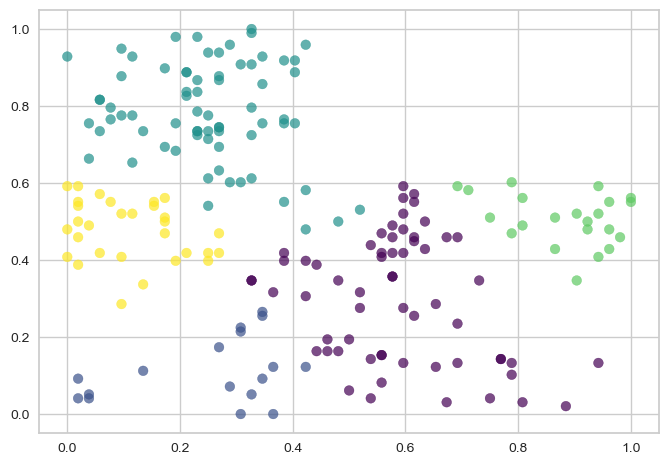

In [74]:
plt.scatter(X_2["Age"], X_2["Spending_Score"], c = model2_hc.labels_, cmap = "viridis", alpha =0.7);

In [75]:
X_comp['Pred(A-S_S-Hierarchical)'] = clusters2_hc
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Pred(Age-S_S-KMeans),Pred(A_I-S_S-KMeans),Pred(A-S_S-Hierarchical)
0,1,Male,19,15,39,0,2,4
1,2,Male,21,15,81,3,3,2
2,3,Female,20,16,6,0,2,1
3,4,Female,23,16,77,3,3,2
4,5,Female,31,17,40,0,2,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,4,2
196,197,Female,45,126,28,1,1,0
197,198,Male,32,126,74,3,4,2
198,199,Male,32,137,18,1,1,1


## Clustering based on Annual Income and Spending Score

In [76]:
X_3

,Annual_Income,Spending_Score
0,0.00,0.39
1,0.00,0.82
2,0.01,0.05
3,0.01,0.78
4,0.02,0.40
...,...,...
195,0.86,0.80
196,0.91,0.28
197,0.91,0.74
198,1.00,0.17


### Hopkins Test

In [77]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]

In [78]:
hopkins(X_3, X_3.shape[0])

# Test result is below 0.5 level

0.3068893325911519

### Dendrogram

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [80]:
hc_ward = linkage(y = X_3, method = "ward")
hc_complete = linkage(X_3, "complete")
hc_average = linkage(X_3, "average")
hc_single = linkage(X_3, "single")

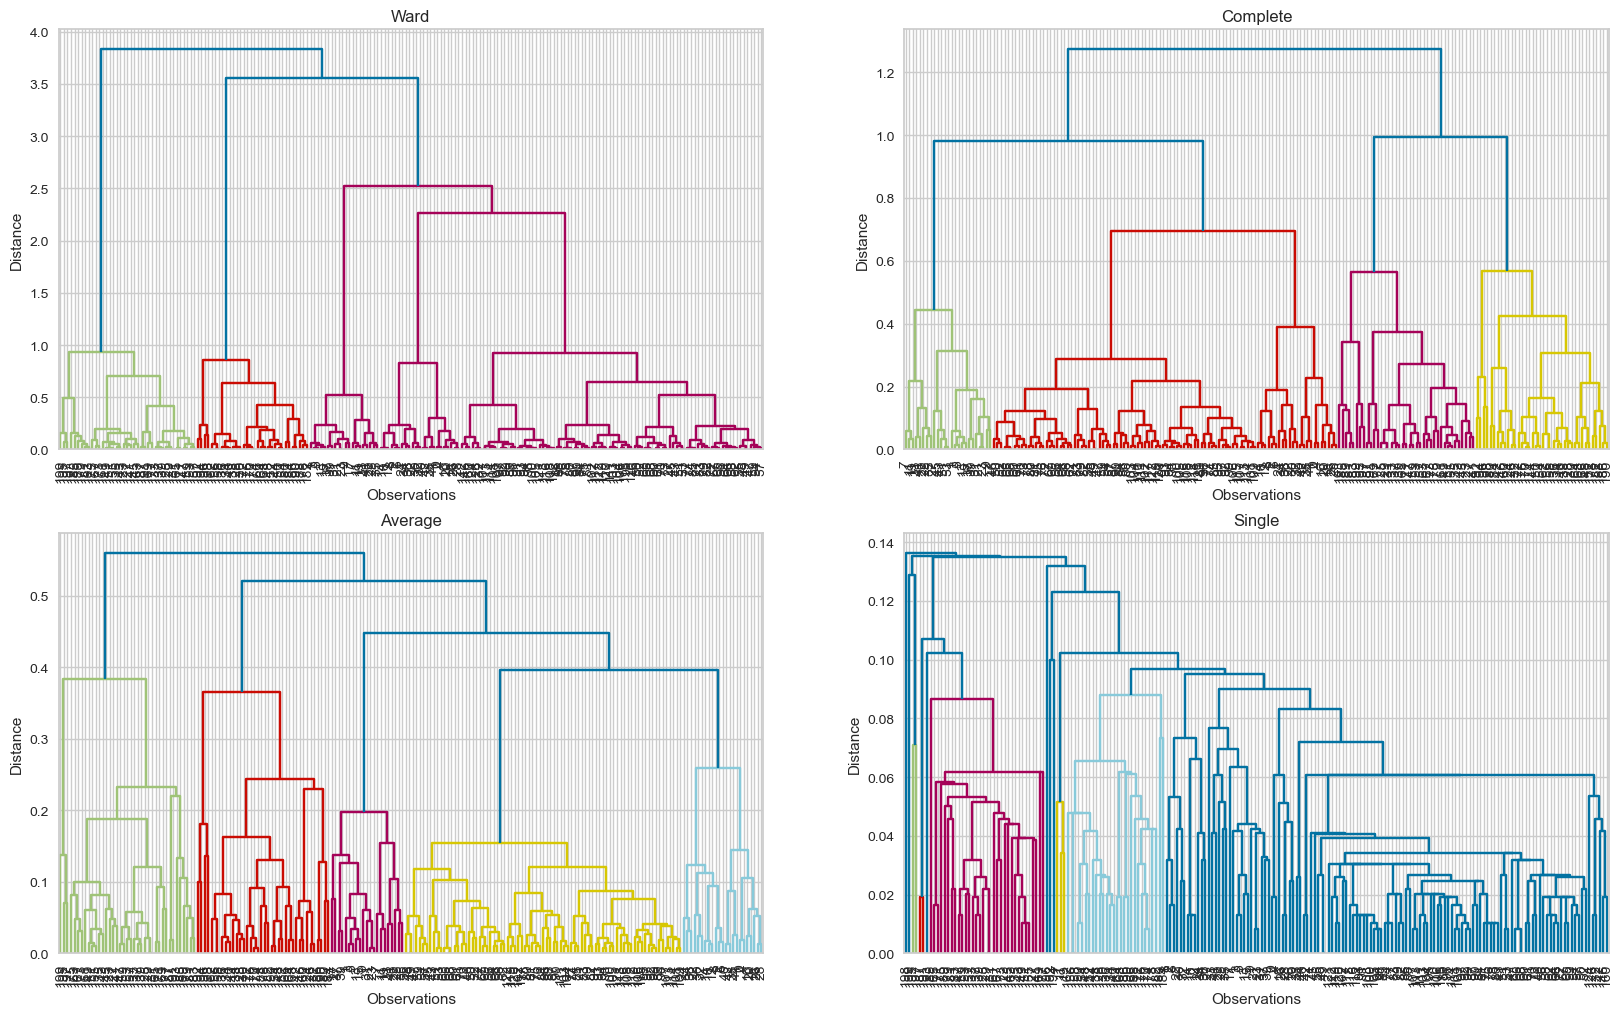

In [81]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### ii. *Applying Agglomerative Clustering*

#### Annual Income and Spending Score

In [82]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_3, model.labels_)}')

Silhouette Score for 2 clusters: 0.39090074717513923
Silhouette Score for 3 clusters: 0.44796167262713327
Silhouette Score for 4 clusters: 0.4976418540005843
Silhouette Score for 5 clusters: 0.5582698727324803
Silhouette Score for 6 clusters: 0.5296670434401043
Silhouette Score for 7 clusters: 0.4093080258867728
Silhouette Score for 8 clusters: 0.4105512797316959
Silhouette Score for 9 clusters: 0.41772103312435854


In [83]:
model3_hc = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")

In [84]:
model3_hc.fit_predict(X_3)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [85]:
model3_hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [86]:
clusters3_hc = model3_hc.labels_

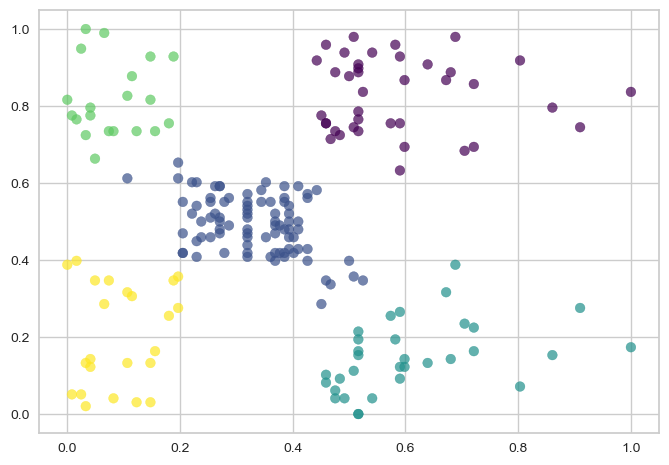

In [87]:
plt.scatter(X_3["Annual_Income"], X_3["Spending_Score"], c = model3_hc.labels_, cmap = "viridis", alpha =0.7);

### iii. *Visualizing and Labeling All the Clusters* 

#### Comparison of Clusters Obtained From Age-Spending Score and Annual_Income-Spending_Score Features

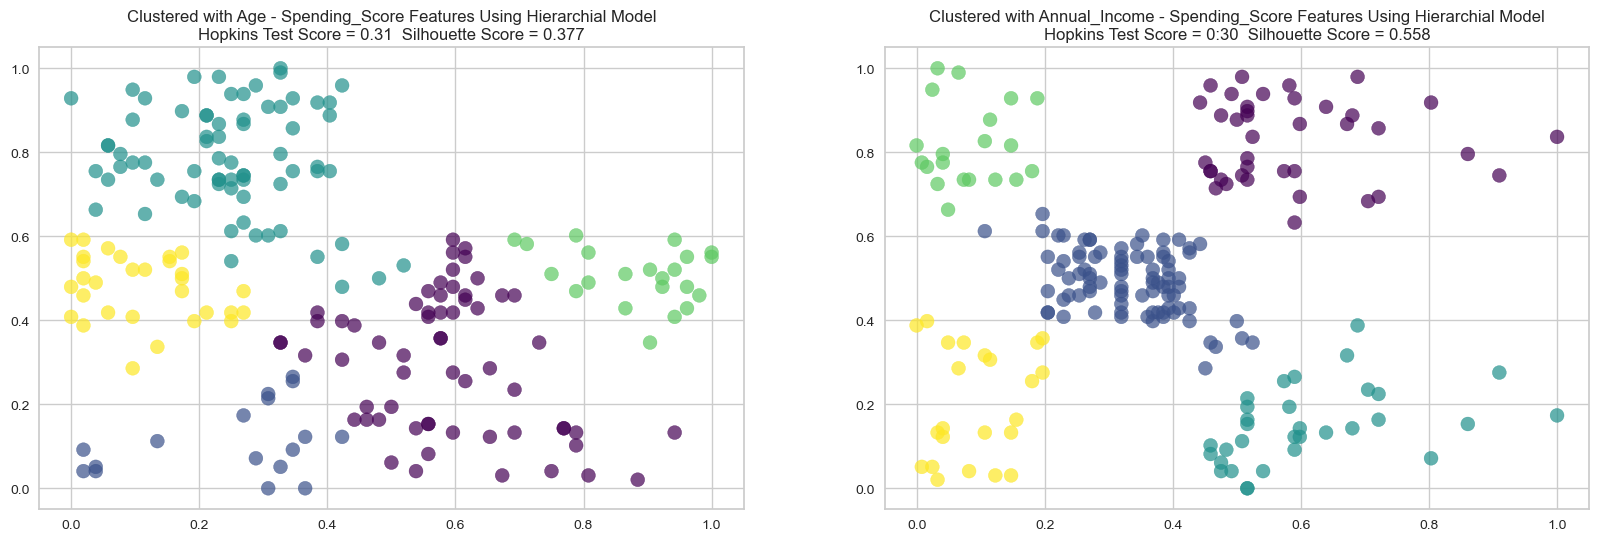

In [88]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X_2["Age"], X_2["Spending_Score"], c = clusters2_hc, cmap = "viridis", alpha=0.7, s=100)
plt.title("Clustered with Age - Spending_Score Features Using Hierarchial Model\nHopkins Test Score = 0.31  Silhouette Score = 0.377")

plt.subplot(122)
plt.scatter(X_3["Annual_Income"], X_3["Spending_Score"], c = clusters3_hc, cmap = "viridis", alpha=0.7, s=100)
plt.title("Clustered with Annual_Income - Spending_Score Features Using Hierarchial Model\nHopkins Test Score = 0:30  Silhouette Score = 0.558");

In [89]:
X_comp['Pred(A_I-S_S-Hierarchical)']=clusters3_hc
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Pred(Age-S_S-KMeans),Pred(A_I-S_S-KMeans),Pred(A-S_S-Hierarchical),Pred(A_I-S_S-Hierarchical)
0,1,Male,19,15,39,0,2,4,4
1,2,Male,21,15,81,3,3,2,3
2,3,Female,20,16,6,0,2,1,4
3,4,Female,23,16,77,3,3,2,3
4,5,Female,31,17,40,0,2,4,4
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,4,2,0
196,197,Female,45,126,28,1,1,0,2
197,198,Male,32,126,74,3,4,2,0
198,199,Male,32,137,18,1,1,1,2


### A) Interpretation based on Annual Income and Spending Score (KMeans Clustering)

In [90]:
columns=['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Pred(A_I-S_S-KMeans)']
df_KMeans = X_comp[columns]
df_KMeans

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,4
196,Female,45,126,28,1
197,Male,32,126,74,4
198,Male,32,137,18,1


#### Interpretation For Cluster 0 

In [91]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==0]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
43,Female,31,39,61,0
46,Female,50,40,55,0
47,Female,27,40,47,0
48,Female,29,40,42,0
49,Female,31,40,42,0
...,...,...,...,...,...
121,Female,38,67,40,0
122,Female,40,69,58,0
126,Male,43,71,35,0
132,Female,25,72,34,0


In [92]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==0].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,81.00,81.00,81.00,81.00
mean,42.72,55.30,49.52,0.00
std,16.45,8.99,6.53,0.00
min,18.00,39.00,34.00,0.00
25%,27.00,48.00,44.00,0.00
50%,46.00,54.00,50.00,0.00
75%,54.00,62.00,55.00,0.00
max,70.00,76.00,61.00,0.00


In [93]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.57
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,0.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,3.00
max,70.00,137.00,99.00,4.00


#### Interpretation For Cluster 1 

In [94]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==1]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
124,Female,23,70,29,1
128,Male,59,71,11,1
130,Male,47,71,9,1
134,Male,20,73,5,1
136,Female,44,73,7,1
138,Male,19,74,10,1
140,Female,57,75,5,1
144,Male,25,77,12,1
146,Male,48,77,36,1
148,Female,34,78,22,1


In [95]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==1].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,35.00,35.00,35.00,35.00
mean,41.11,88.20,17.11,1.00
std,11.34,16.40,9.95,0.00
min,19.00,70.00,1.00,1.00
25%,34.00,77.50,10.00,1.00
50%,42.00,85.00,16.00,1.00
75%,47.50,97.50,23.50,1.00
max,59.00,137.00,39.00,1.00


In [96]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.57
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,0.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,3.00
max,70.00,137.00,99.00,4.00


#### Interpretation For Cluster 2 

In [97]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==2]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
0,Male,19,15,39,2
2,Female,20,16,6,2
4,Female,31,17,40,2
6,Female,35,18,6,2
8,Male,64,19,3,2
10,Male,67,19,14,2
12,Female,58,20,15,2
14,Male,37,20,13,2
16,Female,35,21,35,2
18,Male,52,23,29,2


In [98]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==2].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,23.00,23.00,23.00,23.00
mean,45.22,26.30,20.91,2.00
std,13.23,7.89,13.02,0.00
min,19.00,15.00,3.00,2.00
25%,35.50,19.50,9.50,2.00
50%,46.00,25.00,17.00,2.00
75%,53.50,33.00,33.50,2.00
max,67.00,39.00,40.00,2.00


In [99]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.57
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,0.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,3.00
max,70.00,137.00,99.00,4.00


#### Interpretation For Cluster 3 

In [100]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==3]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
1,Male,21,15,81,3
3,Female,23,16,77,3
5,Female,22,17,76,3
7,Female,23,18,94,3
9,Female,30,19,72,3
11,Female,35,19,99,3
13,Female,24,20,77,3
15,Male,22,20,79,3
17,Male,20,21,66,3
19,Female,35,23,98,3


In [101]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==3].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,22.00,22.00,22.00,22.00
mean,25.27,25.73,79.36,3.00
std,5.26,7.57,10.50,0.00
min,18.00,15.00,61.00,3.00
25%,21.25,19.25,73.00,3.00
50%,23.50,24.50,77.00,3.00
75%,29.75,32.25,85.75,3.00
max,35.00,39.00,99.00,3.00


In [102]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.57
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,0.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,3.00
max,70.00,137.00,99.00,4.00


#### Interpretation For Cluster 4

In [103]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==4]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
123,Male,39,69,91,4
125,Female,31,70,77,4
127,Male,40,71,95,4
129,Male,38,71,75,4
131,Male,39,71,75,4
133,Female,31,72,71,4
135,Female,29,73,88,4
137,Male,32,73,73,4
139,Female,35,74,72,4
141,Male,32,75,93,4


In [104]:
df_KMeans[df_KMeans['Pred(A_I-S_S-KMeans)']==4].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,39.00,39.00,39.00,39.00
mean,32.69,86.54,82.13,4.00
std,3.73,16.31,9.36,0.00
min,27.00,69.00,63.00,4.00
25%,30.00,75.50,74.50,4.00
50%,32.00,79.00,83.00,4.00
75%,35.50,95.00,90.00,4.00
max,40.00,137.00,97.00,4.00


In [105]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-KMeans)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.57
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,0.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,3.00
max,70.00,137.00,99.00,4.00


In [106]:
my_dict = {'Cluster No': [0, 1, 2, 3, 4],
           'Avg_Annual_Income(Clusters)': [55.30,88.20,26.30,25.72,86.53],
           'Avg_Annual_Income(Whole Data)':[60.56,60.56,60.56,60.56,60.56],
           'Avg_Spending_Score(Clusters)': [49.52,17.11,20.91,79.36,82.13],
           'Avg_Spending_Score(Whole Data)': [50.20,50.20,50.20,50.20,50.20],
           'Avg_Age(Clusters)': [42.7,41,45.2,25.27,32.70],
           'Avg_Age(Whole Data)': [38.85,38.85,38.85,38.85,38.85],
           'Percentage_in_Total_Customers': [40,18,11,11,20]}

df_final = pd.DataFrame(my_dict)
df_final

,Cluster No,Avg_Annual_Income(Clusters),Avg_Annual_Income(Whole Data),Avg_Spending_Score(Clusters),Avg_Spending_Score(Whole Data),Avg_Age(Clusters),Avg_Age(Whole Data),Percentage_in_Total_Customers
0,0,55.30,60.56,49.52,50.20,42.70,38.85,40
1,1,88.20,60.56,17.11,50.20,41.00,38.85,18
2,2,26.30,60.56,20.91,50.20,45.20,38.85,11
3,3,25.72,60.56,79.36,50.20,25.27,38.85,11
4,4,86.53,60.56,82.13,50.20,32.70,38.85,20


#### Average Annual_Income of Clusters vs. Average Annual_Income of All Customers

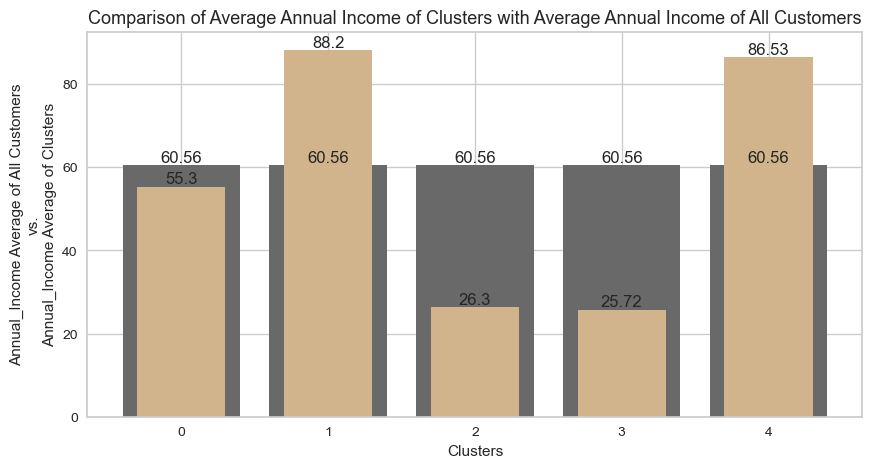

In [107]:
fig, ax= plt.subplots(figsize=(10,5))

ax.bar(df_final['Cluster No'], df_final['Avg_Annual_Income(Whole Data)'], color='dimgrey')
ax.bar(df_final['Cluster No'], df_final['Avg_Annual_Income(Clusters)'], color='tan', width=0.6)
ax.set_xlabel('Clusters')
ax.set_ylabel('Annual_Income Average of All Customers\nvs.\nAnnual_Income Average of Clusters')
ax.set_title('Comparison of Average Annual Income of Clusters with Average Annual Income of All Customers', fontsize=13)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

#### Average Spending_Score of Clusters vs. Average Spending_Score of All Customers

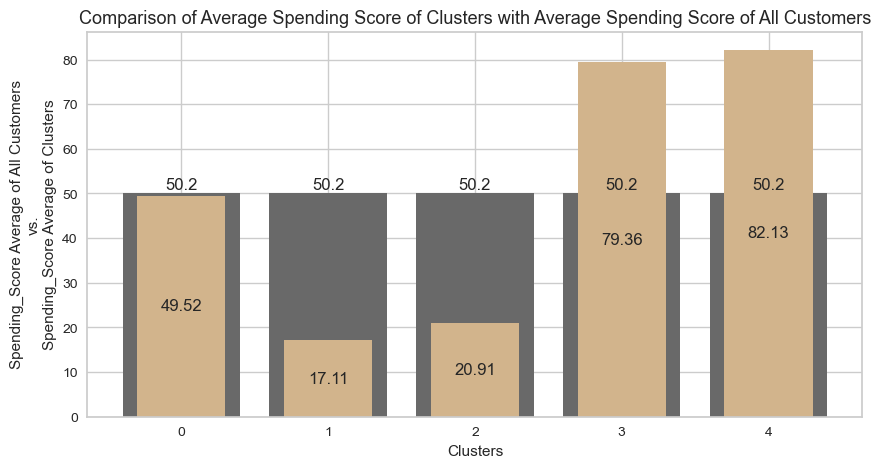

In [108]:
fig, ax= plt.subplots(figsize=(10,5))

ax.bar(df_final['Cluster No'], df_final['Avg_Spending_Score(Whole Data)'], color='dimgrey')
ax.bar(df_final['Cluster No'], df_final['Avg_Spending_Score(Clusters)'], color='tan', width=0.6)
ax.set_xlabel('Clusters')
ax.set_ylabel('Spending_Score Average of All Customers\nvs.\nSpending_Score Average of Clusters')
ax.set_title('Comparison of Average Spending Score of Clusters with Average Spending Score of All Customers', fontsize=13)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1], label_type='center');

#### Average Age of Clusters vs. Average Age of All Customers

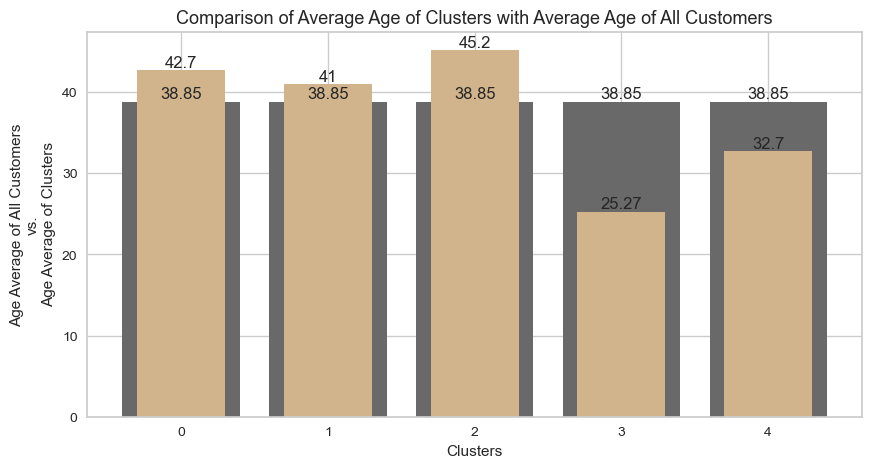

In [109]:
fig, ax= plt.subplots(figsize=(10,5))

ax.bar(df_final['Cluster No'], df_final['Avg_Age(Whole Data)'], color='dimgrey')
ax.bar(df_final['Cluster No'], df_final['Avg_Age(Clusters)'], color='tan', width=0.6)
ax.set_xlabel('Clusters')
ax.set_ylabel('Age Average of All Customers\nvs.\nAge Average of Clusters')
ax.set_title('Comparison of Average Age of Clusters with Average Age of All Customers', fontsize=13)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

In [110]:
def column_barplot(Columns):
   plt.figure(figsize = (8,6))

  
   ax = sns.barplot(x = df_final["Cluster No"], y = df_final[Columns], palette = 'BrBG', edgecolor='black', lw=1)
   plt.xlabel('Clusters',fontsize=15)
   plt.ylabel(Columns,fontsize=15)
   plt.title(Columns, fontsize=17)
   ax.bar_label(ax.containers[0])
cols = df_final.drop(columns=['Avg_Annual_Income(Whole Data)', 'Avg_Spending_Score(Whole Data)', 'Avg_Age(Whole Data)', 'Cluster No']).columns

interact(column_barplot,Columns=cols);

interactive(children=(Dropdown(description='Columns', options=('Avg_Annual_Income(Clusters)', 'Avg_Spending_Sc…

In [112]:
def column_barplot(Columns):
   plt.figure(figsize = (8,6))

  
   ax = sns.barplot(x = X_comp["Pred(A_I-S_S-KMeans)"], y = X_comp[Columns], 
                    hue=X_comp['Gender'], ci=None, palette = 'BrBG', edgecolor='black', lw=1)
   plt.xlabel('Clusters',fontsize=15)
   plt.ylabel(Columns,fontsize=15)
   plt.title(Columns, fontsize=17)
   ax.bar_label(ax.containers[0])
   ax.bar_label(ax.containers[1])
cols = X_comp.drop(columns=['CustomerID', 'Gender', 'Pred(Age-S_S-KMeans)', 
                            'Pred(A-S_S-Hierarchical)', 'Pred(A_I-S_S-Hierarchical)', 
                            'Pred(A_I-S_S-KMeans)']).columns

interact(column_barplot,Columns=cols);

interactive(children=(Dropdown(description='Columns', options=('Age', 'Annual_Income', 'Spending_Score'), valu…

### Final Conclusion with the Clustering Results of KMeans Clustering Method

**Cluster 0** : The average age is around 42, both the Annual_Income and the Spending_Scores are below average. About 40% of the customers are in this cluster. It should be researched what can be done to direct this group to more spending.

**Cluster 1**: The average age is around 41, the Annual_Income of this cluster is significantly high (88,20 where the average is 60.56) and the std is lower than the average one but the Spending_Scores are very low (17.11 where the average is 50.20). Female customers in this group have much more lower Spending Scores than male customers. About 17% of the customers are in this group. This group is our target audience and specific strategies should be developed to drive this group to spend more.

**Cluster 2** :The average age is around 45. The Annual_Income (26.30 where the average is 60.56) and the spending_scores (20.91 where the average is 50.20) are very low. About 11% of our customers are in this group. It should be researched what can be done to direct this group to more spending.
    
**Cluster 3**: The average age is around 25. 11% of our customers belong this group. The Annual_Income is significantly low (25.72, the average is 60.56) whereas the Spending_Score is significantly high (79.36, the average is 50.20). Despite their low income, this group is our loyal and profitable customers. Something should be done to keep up their loyalty.

**Cluster 4**: The average age is around 32. About 20% of our customers belong this cluster. Both the Annual_Income (86.54, the average is 60.56) and Spending_Score (82.13, the average is 50.20) is significantly higher than the average values of the total. This group is our premier customers. Specific strategies should be done to keep up their loyalty and to let them spend more.

### B) Interpretation based on Annual Income and Spending Score (Hierarchical Clustering)

In [113]:
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Pred(Age-S_S-KMeans),Pred(A_I-S_S-KMeans),Pred(A-S_S-Hierarchical),Pred(A_I-S_S-Hierarchical)
0,1,Male,19,15,39,0,2,4,4
1,2,Male,21,15,81,3,3,2,3
2,3,Female,20,16,6,0,2,1,4
3,4,Female,23,16,77,3,3,2,3
4,5,Female,31,17,40,0,2,4,4
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,4,2,0
196,197,Female,45,126,28,1,1,0,2
197,198,Male,32,126,74,3,4,2,0
198,199,Male,32,137,18,1,1,1,2


In [114]:
columns=['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Pred(A_I-S_S-Hierarchical)']
df_hc = X_comp[columns]
df_hc

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


#### Interpretation For Cluster 0 

In [115]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==0]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
123,Male,39,69,91,0
125,Female,31,70,77,0
127,Male,40,71,95,0
129,Male,38,71,75,0
131,Male,39,71,75,0
133,Female,31,72,71,0
135,Female,29,73,88,0
137,Male,32,73,73,0
139,Female,35,74,72,0
141,Male,32,75,93,0


In [116]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==0].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,39.00,39.00,39.00,39.00
mean,32.69,86.54,82.13,0.00
std,3.73,16.31,9.36,0.00
min,27.00,69.00,63.00,0.00
25%,30.00,75.50,74.50,0.00
50%,32.00,79.00,83.00,0.00
75%,35.50,95.00,90.00,0.00
max,40.00,137.00,97.00,0.00


In [117]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.24
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,1.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,2.00
max,70.00,137.00,99.00,4.00


#### Interpretation For Cluster 1 

In [118]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==1]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
27,Male,35,28,61,1
43,Female,31,39,61,1
45,Female,24,39,65,1
46,Female,50,40,55,1
47,Female,27,40,47,1
...,...,...,...,...,...
126,Male,43,71,35,1
132,Female,25,72,34,1
142,Female,28,76,40,1
146,Male,48,77,36,1


In [119]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==1].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,86.00,86.00,86.00,86.00
mean,42.40,55.49,49.27,1.00
std,16.32,10.13,7.35,0.00
min,18.00,28.00,29.00,1.00
25%,27.00,48.00,43.00,1.00
50%,45.50,55.50,49.50,1.00
75%,54.00,63.00,55.00,1.00
max,70.00,79.00,65.00,1.00


In [120]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.24
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,1.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,2.00
max,70.00,137.00,99.00,4.00


#### Interpretation For Cluster 2 

In [121]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==2]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
128,Male,59,71,11,2
130,Male,47,71,9,2
134,Male,20,73,5,2
136,Female,44,73,7,2
138,Male,19,74,10,2
140,Female,57,75,5,2
144,Male,25,77,12,2
148,Female,34,78,22,2
150,Male,43,78,17,2
152,Female,44,78,20,2


In [122]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==2].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,32.00,32.00,32.00,32.00
mean,41.00,89.41,15.59,2.00
std,11.04,16.61,8.94,0.00
min,19.00,71.00,1.00,2.00
25%,34.00,78.00,9.75,2.00
50%,41.50,86.50,15.00,2.00
75%,47.00,98.25,20.50,2.00
max,59.00,137.00,39.00,2.00


In [123]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.24
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,1.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,2.00
max,70.00,137.00,99.00,4.00


#### Interpretation For Cluster 3 

In [124]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==3]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
1,Male,21,15,81,3
3,Female,23,16,77,3
5,Female,22,17,76,3
7,Female,23,18,94,3
9,Female,30,19,72,3
11,Female,35,19,99,3
13,Female,24,20,77,3
15,Male,22,20,79,3
17,Male,20,21,66,3
19,Female,35,23,98,3


In [125]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==3].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,20.00,20.00,20.00,20.00
mean,24.85,24.95,81.00,3.00
std,5.03,7.29,9.51,0.00
min,18.00,15.00,66.00,3.00
25%,21.00,19.00,73.00,3.00
50%,23.00,23.50,78.00,3.00
75%,29.25,30.75,88.25,3.00
max,35.00,38.00,99.00,3.00


In [126]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.24
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,1.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,2.00
max,70.00,137.00,99.00,4.00


#### Interpretation For Cluster 4 

In [127]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==4]

,Gender,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
0,Male,19,15,39,4
2,Female,20,16,6,4
4,Female,31,17,40,4
6,Female,35,18,6,4
8,Male,64,19,3,4
10,Male,67,19,14,4
12,Female,58,20,15,4
14,Male,37,20,13,4
16,Female,35,21,35,4
18,Male,52,23,29,4


In [128]:
df_hc[df_hc['Pred(A_I-S_S-Hierarchical)']==4].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,23.00,23.00,23.00,23.00
mean,45.22,26.30,20.91,4.00
std,13.23,7.89,13.02,0.00
min,19.00,15.00,3.00,4.00
25%,35.50,19.50,9.50,4.00
50%,46.00,25.00,17.00,4.00
75%,53.50,33.00,33.50,4.00
max,67.00,39.00,40.00,4.00


In [129]:
df[columns].describe()

,Age,Annual_Income,Spending_Score,Pred(A_I-S_S-Hierarchical)
count,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,1.51
std,13.97,26.26,25.82,1.24
min,18.00,15.00,1.00,0.00
25%,28.75,41.50,34.75,1.00
50%,36.00,61.50,50.00,1.00
75%,49.00,78.00,73.00,2.00
max,70.00,137.00,99.00,4.00


In [130]:
my_dict = {'Cluster No': [0, 1, 2, 3, 4],
           'Avg_Annual_Income(Clusters)': [86.54,55.49,89.41,24.95,26.30],
           'Avg_Annual_Income(Whole Data)':[60.56,60.56,60.56,60.56,60.56],
           'Avg_Spending_Score(Clusters)': [82.13,49.27,15.59,81.00,20.91],
           'Avg_Spending_Score(Whole Data)': [50.20,50.20,50.20,50.20,50.20],
           'Avg_Age(Clusters)': [32.69,42.40,41,24.85,45.22],
           'Avg_Age(Whole Data)': [38.85,38.85,38.85,38.85,38.85],
           'Percentage_in_Total_Customers': [19.5,43,16,10,11.5]}

df_final2 = pd.DataFrame(my_dict)
df_final2

,Cluster No,Avg_Annual_Income(Clusters),Avg_Annual_Income(Whole Data),Avg_Spending_Score(Clusters),Avg_Spending_Score(Whole Data),Avg_Age(Clusters),Avg_Age(Whole Data),Percentage_in_Total_Customers
0,0,86.54,60.56,82.13,50.20,32.69,38.85,19.50
1,1,55.49,60.56,49.27,50.20,42.40,38.85,43.00
2,2,89.41,60.56,15.59,50.20,41.00,38.85,16.00
3,3,24.95,60.56,81.00,50.20,24.85,38.85,10.00
4,4,26.30,60.56,20.91,50.20,45.22,38.85,11.50


#### Average Annual_Income of Clusters vs. Average Annual_Income of All Customers

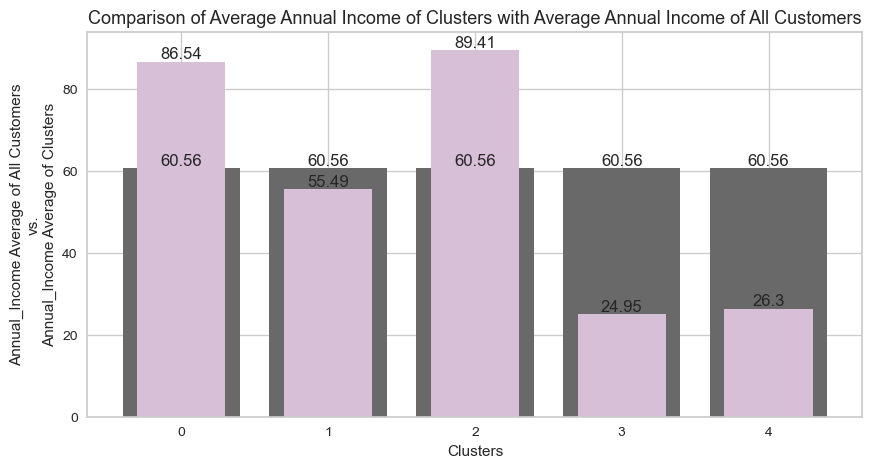

In [131]:
fig, ax= plt.subplots(figsize=(10,5))

ax.bar(df_final2['Cluster No'], df_final2['Avg_Annual_Income(Whole Data)'], color='dimgrey')
ax.bar(df_final2['Cluster No'], df_final2['Avg_Annual_Income(Clusters)'], color='thistle', width=0.6)
ax.set_xlabel('Clusters')
ax.set_ylabel('Annual_Income Average of All Customers\nvs.\nAnnual_Income Average of Clusters')
ax.set_title('Comparison of Average Annual Income of Clusters with Average Annual Income of All Customers', fontsize=13)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

#### Average Spending_Score of Clusters vs. Average Spending_Score of All Customers

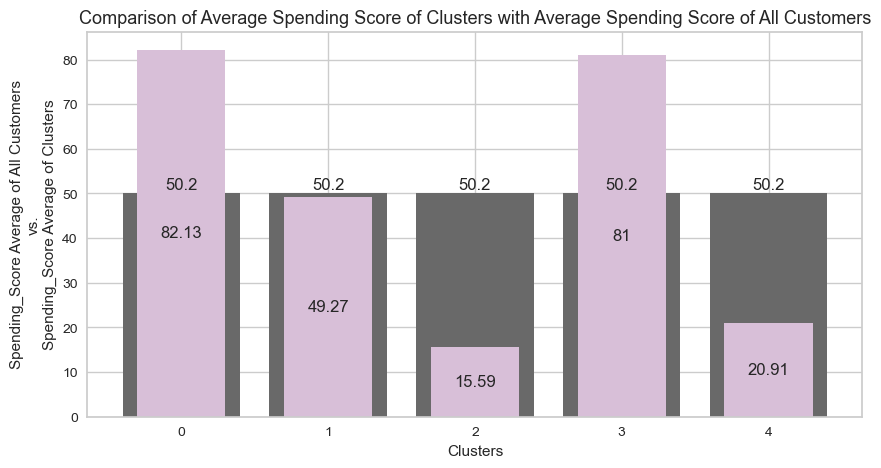

In [132]:
fig, ax= plt.subplots(figsize=(10,5))

ax.bar(df_final2['Cluster No'], df_final2['Avg_Spending_Score(Whole Data)'], color='dimgrey')
ax.bar(df_final2['Cluster No'], df_final2['Avg_Spending_Score(Clusters)'], color='thistle', width=0.6)
ax.set_xlabel('Clusters')
ax.set_ylabel('Spending_Score Average of All Customers\nvs.\nSpending_Score Average of Clusters')
ax.set_title('Comparison of Average Spending Score of Clusters with Average Spending Score of All Customers', fontsize=13)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1], label_type='center');

#### Average Age of Clusters vs. Average Age of All Customers

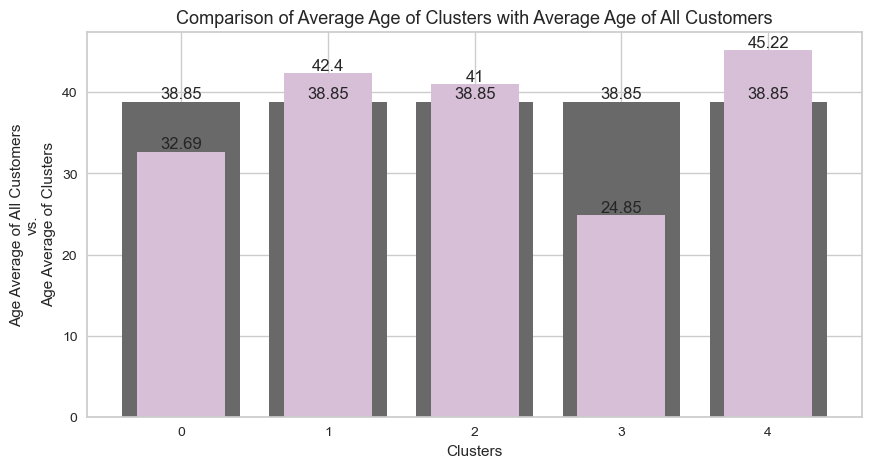

In [133]:
fig, ax= plt.subplots(figsize=(10,5))

ax.bar(df_final2['Cluster No'], df_final2['Avg_Age(Whole Data)'], color='dimgrey')
ax.bar(df_final2['Cluster No'], df_final2['Avg_Age(Clusters)'], color='thistle', width=0.6)
ax.set_xlabel('Clusters')
ax.set_ylabel('Age Average of All Customers\nvs.\nAge Average of Clusters')
ax.set_title('Comparison of Average Age of Clusters with Average Age of All Customers', fontsize=13)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

In [134]:
def column_barplot(Columns):
   plt.figure(figsize = (8,6))

  
   ax = sns.barplot(x = df_final2["Cluster No"], y = df_final2[Columns], palette = 'RdPu', edgecolor='black', lw=1)
   plt.xlabel('Clusters',fontsize=15)
   plt.ylabel(Columns,fontsize=15)
   plt.title(Columns, fontsize=17)
   ax.bar_label(ax.containers[0])
cols = df_final2.drop(columns=['Avg_Annual_Income(Whole Data)', 'Avg_Spending_Score(Whole Data)', 'Avg_Age(Whole Data)', 'Cluster No']).columns

interact(column_barplot,Columns=cols);

interactive(children=(Dropdown(description='Columns', options=('Avg_Annual_Income(Clusters)', 'Avg_Spending_Sc…

In [135]:
def column_barplot(Columns):
   plt.figure(figsize = (8,6))

  
   ax = sns.barplot(x = X_comp["Pred(A_I-S_S-Hierarchical)"], y = X_comp[Columns], 
                    hue=X_comp['Gender'], ci=None, palette = 'RdPu', edgecolor='black', lw=1)
   plt.xlabel('Clusters',fontsize=15)
   plt.ylabel(Columns,fontsize=15)
   plt.title(Columns, fontsize=17)
   ax.bar_label(ax.containers[0])
   ax.bar_label(ax.containers[1])
cols = X_comp.drop(columns=['CustomerID', 'Gender', 'Pred(Age-S_S-KMeans)', 
                            'Pred(A-S_S-Hierarchical)', 'Pred(A_I-S_S-Hierarchical)', 
                            'Pred(A_I-S_S-KMeans)']).columns

interact(column_barplot,Columns=cols);

interactive(children=(Dropdown(description='Columns', options=('Age', 'Annual_Income', 'Spending_Score'), valu…

### Final Conclusion with the Clustering Results of Hierarchical Clustering Method

**Cluster 0** : The average age is around 33,  About 20% of our customers belong this cluster. Both the Annual_Income (86.54, the average is 60.56) and Spending_Score (82.13, the average is 50.20) is significantly higher than the average values of the total. This group is our premier customers. Specific strategies should be done to keep up their loyalty and to let them spend more.

**Cluster 1**: The average age is around 42, both annual_income and spending_scores are below the average. 
43% of our customers belong this cluster. It should be researched what can be done to direct this group to more spending.

**Cluster 2** :The average age is around 41, the Annual_Income of this cluster is significantly high (89,41 where the average is 60.56) and the std is lower than the average one but the Spending_Scores are very low (15.59 where the average is 50.20). Female customers in this group have much more lower Spending Scores than male customers. About 16% of the customers are in this group. This group is our target audience and specific strategies should be developed to drive this group to spend more. This group has great potential.

**Cluster 3**: The average age is around 25. 10% of our customers belong this group. The Annual_Income is significantly low (24.95, the average is 60.56) whereas the Spending_Score is significantly high (81.00, the average is 50.20). Despite their low income, this group is our loyal and profitable customers. Something should be done to keep up their loyalty.

**Cluster 4**: The average age is around 45. The Annual_Income (26.30 where the average is 60.56) and the spending_scores (20.91 where the average is 50.20) are very low. About 11.5% of our customers are in this group. It should be researched what can be done to direct this group to more spending.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___